In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv("daily_weather - daily_weather.csv")

In [65]:
df.shape

(1095, 10)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   high_humidity_3pm       1095 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.7 KB


In [67]:
df.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
count,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,0.499543
std,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,0.500228
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,0.000000
25%,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,0.000000
50%,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,0.000000
75%,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,1.000000


In [68]:
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [69]:
df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'high_humidity_3pm'],
      dtype='object')

In [70]:
df.dtypes

air_pressure_9am          float64
air_temp_9am              float64
avg_wind_direction_9am    float64
avg_wind_speed_9am        float64
max_wind_direction_9am    float64
max_wind_speed_9am        float64
rain_accumulation_9am     float64
rain_duration_9am         float64
relative_humidity_9am     float64
high_humidity_3pm           int64
dtype: object

In [71]:
df.isnull().sum().sort_values(ascending=False)

rain_accumulation_9am     6
air_temp_9am              5
max_wind_speed_9am        4
avg_wind_direction_9am    4
air_pressure_9am          3
avg_wind_speed_9am        3
max_wind_direction_9am    3
rain_duration_9am         3
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [72]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

[]

In [73]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'high_humidity_3pm']

In [74]:
df_before = df.copy()

In [75]:
for col in categorical_cols:df[col].fillna(df[col].mode()[0], inplace=True)

for col in numeric_cols:df[col].fillna(df[col].mean(), inplace=True)

In [76]:
df.isnull().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [77]:
# split the dataset into features and target column
df.columns = df.columns.str.strip()
x=df.drop("high_humidity_3pm",axis=1)
y=df["high_humidity_3pm"]

In [78]:
df["high_humidity_3pm"].value_counts()

high_humidity_3pm
0    548
1    547
Name: count, dtype: int64

In [79]:
# divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [80]:
x_train.shape,y_train.shape

((821, 9), (821,))

In [81]:
x_test.shape,y_test.shape

((274, 9), (274,))

In [82]:
#aplly the ML algorithm
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,max_depth=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10)

In [83]:
#model prediction
y_pred=model.predict(x_test)

In [84]:
y_pred[:5]

array([1, 0, 0, 0, 0])

In [85]:
y_test[:5]

533    1
139    0
88     0
841    0
985    0
Name: high_humidity_3pm, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9051094890510949
Precision: 0.8785714285714286
Recall: 0.9318181818181818
F1 Score: 0.9044117647058824

Confusion Matrix:
 [[125  17]
 [  9 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       142
           1       0.88      0.93      0.90       132

    accuracy                           0.91       274
   macro avg       0.91      0.91      0.91       274
weighted avg       0.91      0.91      0.91       274



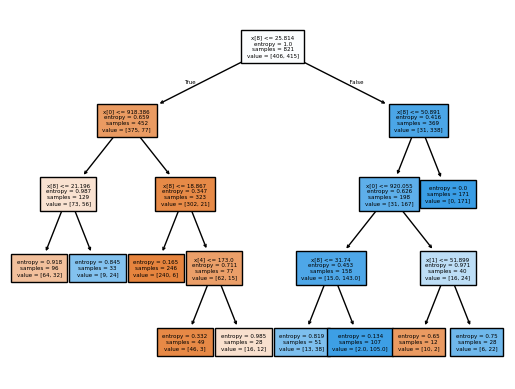

In [88]:
from sklearn.tree import plot_tree
plt.Figure(figsize=(20,10))
plot_tree(model,filled=True,fontsize=4)
plt.show()
